In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
ds = pd.read_csv("Social_Status.csv")
#ds

In [57]:
new_ds = ds.drop(['State','Year','Type_code','Age_group'],axis='columns')
new_ds

Type  Gender  Total
0          Seperated  Female    175
1    Widowed/Widower  Female    435
2            Married  Female   3557
3           Divorcee  Female    175
4      Never Married  Female   1853
..               ...     ...    ...
115        Seperated    Male    149
116  Widowed/Widower    Male    233
117          Married    Male   5451
118         Divorcee    Male    189
119    Never Married    Male   2658

[120 rows x 3 columns]

# One Hot Coding of Gender

In [58]:
def replace_gender(val):
    if val == "Female": return 1
    else: return 0

new_ds['Gender'] = new_ds['Gender'].apply(replace_gender)

# Level Coding of Social-Type

In [59]:
new_ds['Type'].unique()

array(['Seperated', 'Widowed/Widower', 'Married', 'Divorcee',
       'Never Married'], dtype=object)

In [60]:
new_ds['Type'].replace({
    'Seperated' : 2,
    'Widowed/Widower' : 4,
    'Married' : 1, 
    'Divorcee' : 3,
    'Never Married' : 0
}, inplace = True)

In [61]:
new_ds

Type  Gender  Total
0       2       1    175
1       4       1    435
2       1       1   3557
3       3       1    175
4       0       1   1853
..    ...     ...    ...
115     2       0    149
116     4       0    233
117     1       0   5451
118     3       0    189
119     0       0   2658

[120 rows x 3 columns]

# Linear Regression on Social Level vs Total

In [44]:
model = LinearRegression()
X = new_ds.drop(['Gender','Total'],axis = 'columns')
Y = new_ds.Total

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=1/3)

In [45]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

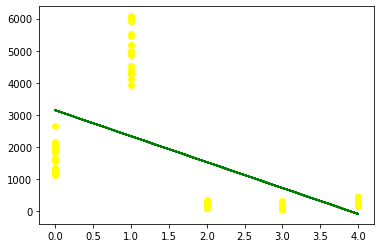

In [49]:
plt.scatter(x_train,y_train,color = 'yellow')
plt.plot(x_train,model.predict(x_train),color='green')

# Normalizing Total

In [62]:
val_min = new_ds['Total'].min()
val_max = new_ds['Total'].max()
print(val_min,val_max)

61 6933


In [63]:
new_ds['Total'] = new_ds['Total'].apply(lambda v: (v - val_min)/(val_max - val_min))

In [64]:
new_ds

Type  Gender     Total
0       2       1  0.016589
1       4       1  0.054424
2       1       1  0.508731
3       3       1  0.016589
4       0       1  0.260768
..    ...     ...       ...
115     2       0  0.012806
116     4       0  0.025029
117     1       0  0.784342
118     3       0  0.018626
119     0       0  0.377910

[120 rows x 3 columns]

# Linear Regression on Normalized Data

In [65]:
model = LinearRegression()
X1 = new_ds.drop(['Gender','Total'],axis = 'columns')
Y1 = new_ds.Total

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1,test_size=1/3)

In [66]:
model.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

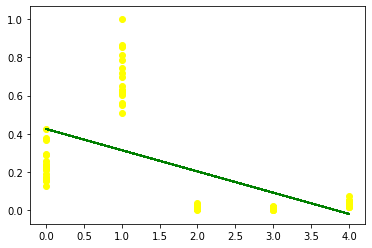

In [68]:
plt.scatter(x_train1,y_train1,color = 'yellow')
plt.plot(x_train1,model.predict(x_train1),color='green')